In [5]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

In [6]:
import colorsys
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle
import seaborn as sns

def phase_to_rgb(complex_number):
    """Map a phase of a complexnumber to a color in (r,g,b).

    complex_number is phase is first mapped to angle in the range
    [0, 2pi] and then to the HSL color wheel
    """
    angles = (np.angle(complex_number) + np.pi + np.pi/6) % (np.pi * 2)
    rgb = colorsys.hls_to_rgb(angles / (np.pi * 2), 0.5, 0.5)
    return rgb

### Secondary Axis Defition
amp_to_prob = lambda x: x**2
prob_to_amp = lambda x: np.sqrt(x)

### Polar Representation

In [51]:
import colorsys
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle
import seaborn as sns

def phase_to_rgb(complex_number):
    """Map a phase of a complexnumber to a color in (r,g,b).

    complex_number is phase is first mapped to angle in the range
    [0, 2pi] and then to the HSL color wheel
    """
    angles = (np.angle(complex_number) + np.pi + np.pi/6) % (np.pi * 2)
    rgb = colorsys.hls_to_rgb(angles / (np.pi * 2), 0.5, 0.5)
    return rgb

### Secondary Axis Defition
amp_to_prob = lambda x: x**2
prob_to_amp = lambda x: np.sqrt(x)

def plot_state_amp_polar(sv, use_degrees = False, title = None):
    """
    Plot the Amplitude and Phase of an arbitrary statevector
    
    Parameters:
    -----------
    sv: ndarray
        Normalized statevector with dimension 2**n
        
    use_degrees: bool (False)
        Display phase circle in degrees option
        
    title: str (None)
        Title of the plot
    
    """
    sv = np.squeeze(sv)
    
    ### Dimension of the vector
    sv_dim = int(np.log2(max(sv.shape))) 

    ### Absolute Amplitude
    amp_vec = np.squeeze(np.abs(sv))

    phase_vec = np.exp(1j*np.angle(sv))
    
    ### Get x-axis label
    inp_list = [''.join(output) for output in product(['0', '1'], repeat = sv_dim)]
    
    ### Get color
    color_list = [phase_to_rgb(output) for output in phase_vec]
    
    gs = gridspec.GridSpec(nrows=6, ncols=6)

    fig = plt.figure(figsize  = (10, 5))

    ### Amplitude histogram
    ax1 = fig.add_subplot(gs[:, :4])
    ax1.set_yticks([0, .1, .2, .3, .4, .5, .6, .7 ,.8, .9, 1])
    ax1.bar(inp_list, amp_vec, width = 0.8, align = 'center', color = color_list)
    ax1.set_ylabel('Absolute Amplitude\n')


    ### Probability axis
    ax11 = ax1.secondary_yaxis('right', functions=(amp_to_prob, prob_to_amp))
    ax11.set_yticks([0, .1, .2, .3, .4, .5, .6, .7 ,.8, .9, 1])
    ax11.set_ylabel('\nProbability')


    ### Other labels
    #plt.xlabel('\nComputational Basis States', loc = 'center')
    plt.xlabel('\nComputational Basis States')
    plt.xticks(rotation=55, horizontalalignment='center')
    
    if title:
        
        plt.title(f'{title} \n')
        
    else:
        plt.title('Statevector Amplitudes and Phases\n')
        

    n = 16
    theta = np.ones(n)
    colors = sns.hls_palette(n)

    ax2 = fig.add_subplot(gs[4:, 4:])
    ax2.pie(theta, colors=colors[5 * n // 8 :] + colors[: 5 * n // 8], radius=0.8)
    ax2.add_artist(Circle((0, 0), 0.5, color="white", zorder=1))
    ax2.add_artist(Circle((0, 0), 0.85, color="black", zorder=0.75))
    offset = 1  # since radius of sphere is one.

    if use_degrees:
        labels = ["Phase", "0", "90", "180   ", "270"]
    else:
        labels = ["Phase", "$0$", "$\\pi/2$", "$\\pi$", "$3\\pi/2$"]


    ax2.text(0, 0, labels[0], horizontalalignment="center", verticalalignment="center", fontsize=10) # 'Phase'
    ax2.text(offset+0.1, 0, labels[1], horizontalalignment="center", verticalalignment="center", fontsize=10) # 0
    ax2.text(0, offset+0.1, labels[2], horizontalalignment="center", verticalalignment="center", fontsize=10) # pi/2
    ax2.text(-offset-0.1, 0, labels[3], horizontalalignment="center", verticalalignment="center", fontsize=10) # pi
    ax2.text(0, -offset-0.1, labels[4], horizontalalignment="center", verticalalignment="center", fontsize=10) #3pi/2
    
    plt.close()
    
    return fig

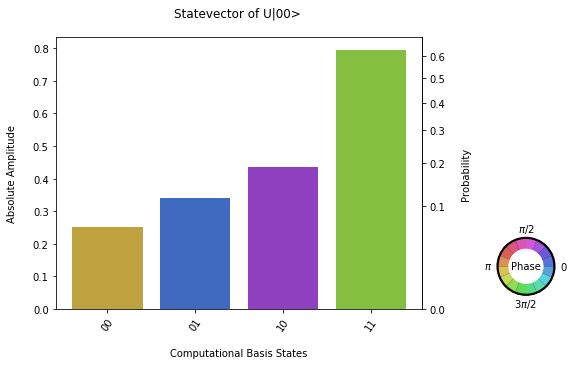

In [22]:
sv = random_statevector(4).data

plot_state_amp_polar(sv, title = 'Statevector of U|00>')

In [32]:
print(f"Phase of each basis state: {np.angle(sv)/(2*np.pi)}") # as a ratio of 2pi
print(f"Magnitude of each basis state: {np.abs(sv)}")

Phase of each basis state: [-0.45469897  0.02780601  0.18738402 -0.33994864]
Magnitude of each basis state: [0.25084687 0.34160199 0.43601399 0.79389907]


### Cartesian Representation

In [49]:
def plot_state_amp_cartesian(sv, title = None):
    """
    Plot the Amplitude and Phase of an arbitrary statevector
    
    Parameters:
    -----------
    sv: ndarray
        Normalized statevector with dimension 2**n
        
    title: str (None)
        Title of the plot
    """

    sv = np.squeeze(sv)

    ### Dimension of the vector
    sv_dim = int(np.log2(max(sv.shape))) 

    ### Get real and imaginary component

    sv_real = np.real(sv)
    sv_imag = np.imag(sv)

    ### Get x-axis label
    inp_list = [''.join(output) for output in product(['0', '1'], repeat = sv_dim)]

    gs = gridspec.GridSpec(nrows=1, ncols=8)

    fig = plt.figure(figsize  = (12, 5))
    fig.align_ylabels()

    ### Real Plot
    ax1 = fig.add_subplot(gs[:, :4])
    ax1.bar(inp_list, sv_real, width = 0.8, align = 'center')

    ax1.axhline(color = 'black')

    ax1.set_ylim(-1, 1)
    ax1.set_ylabel('\nAmplitudes')
    plt.title('\nReal Component')
    plt.xlabel('\nComputational Basis States')
    plt.xticks(rotation=55, horizontalalignment='center')


    ### Imaginary Plot
    ax2 = fig.add_subplot(gs[:, 4:])
    ax2.bar(inp_list, sv_imag, width = 0.8, align = 'center', color = 'maroon')

    ax2.axhline(color = 'black')
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    ax2.set_ylim(-1, 1)
    ax2.set_ylabel('\nAmplitudes')
    plt.title('\nImaginary Component')
    plt.xlabel('\nComputational Basis States')
    plt.xticks(rotation=55, horizontalalignment='center')

    plt.show()

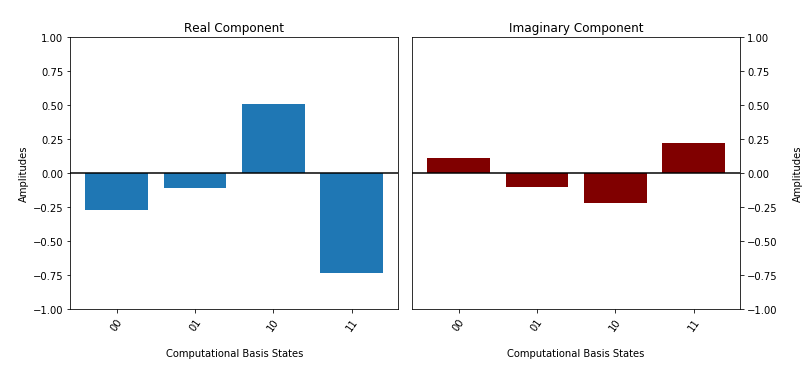

In [50]:
sv = random_statevector(4).data
plot_state_amp_cartesian(sv)

In [48]:
print(f"Real component of each basis state: {np.real(sv)}")
print(f"Imag component of each basis state: {np.imag(sv)}")

Real component of each basis state: [ 0.28226348 -0.36447205 -0.13874423  0.02766195]
Imag component of each basis state: [-0.38933999 -0.09276039  0.60532956 -0.49077318]
